In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
import eif as iso

# 1. Загрузка данных

In [2]:
%load_ext sql
%sql sqlite:///Diamonds

In [3]:
db = %sql select * from Diamond
db = db.DataFrame()
db = db.set_index("id")

 * sqlite:///Diamonds
Done.


# 2. Data preproccesing

In [4]:
db[:5]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [6]:
db.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [7]:
db.describe(include=object)

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16230,8410,9779


In [8]:
db.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
db.nunique()

carat       269
cut           5
color         7
clarity       8
depth       179
table       122
x           546
y           544
z           366
price      3512
dtype: int64

/tmp/ipykernel_6479/4111826463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(method='spearman'), annot=True, fmt=".2f")


<AxesSubplot: >

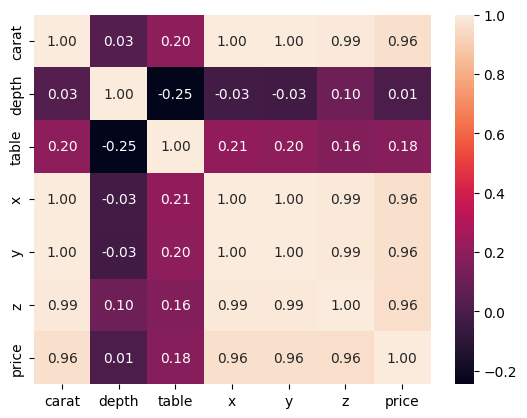

In [10]:
sns.heatmap(db.corr(method='spearman'), annot=True, fmt=".2f")

## 2.1 One Hot Encoding + Normalization

In [11]:
db2 = pd.get_dummies(data=db, drop_first=True)

In [12]:
x = db2.values
columns = db2.columns

In [37]:
min_max_Scaler = MinMaxScaler()
min_max_Scaler.fit(x)
min_max_arr = np.stack((min_max_Scaler.data_max_, min_max_Scaler.data_min_))
min_max_pd = pd.DataFrame(min_max_arr, columns=columns)
min_max_pd.to_csv("norm_params.csv", index=False)

In [28]:
x_scaled = min_max_Scaler.fit_transform(x)
db2 = pd.DataFrame(x_scaled, columns=columns)
db2[:10]

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.020790,0.538889,0.274510,0.401304,0.072666,0.084277,0.139581,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.168399,0.547222,0.235294,0.597765,0.109677,0.127044,0.837485,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.108108,0.522222,0.294118,0.531657,0.097453,0.111321,0.541554,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.182952,0.561111,0.254902,0.608939,0.110357,0.129560,0.637238,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.033264,0.536111,0.294118,0.418994,0.077250,0.088679,0.197534,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.068607,0.511111,0.254902,0.482309,0.088285,0.100314,0.421455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.320166,0.530556,0.294118,0.716015,0.129542,0.149686,0.787176,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.027027,0.472222,0.235294,0.421788,0.077419,0.085535,0.268804,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.024948,0.552778,0.235294,0.405959,0.074533,0.086478,0.189149,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.014553,0.522222,0.254902,0.387337,0.069949,0.080503,0.220962,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
db2.describe()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.124236,0.520733,0.263759,0.533442,0.097333,0.111237,0.492435,0.091015,0.401187,0.255543,...,0.153331,0.100606,0.052453,0.032431,0.241725,0.171079,0.150266,0.228872,0.069386,0.092572
std,0.098948,0.039911,0.043815,0.104771,0.019606,0.022359,0.250759,0.287634,0.490145,0.436171,...,0.360311,0.300810,0.222942,0.177144,0.428134,0.376583,0.357336,0.420112,0.254112,0.289835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041580,0.500000,0.235294,0.438547,0.080136,0.091509,0.262392,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103950,0.522222,0.254902,0.529795,0.096774,0.110692,0.491492,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.174636,0.541667,0.294118,0.608939,0.111036,0.126730,0.689026,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
db2 = db2.drop(columns = ["x", "y", "z"])

<AxesSubplot: xlabel='price', ylabel='Count'>

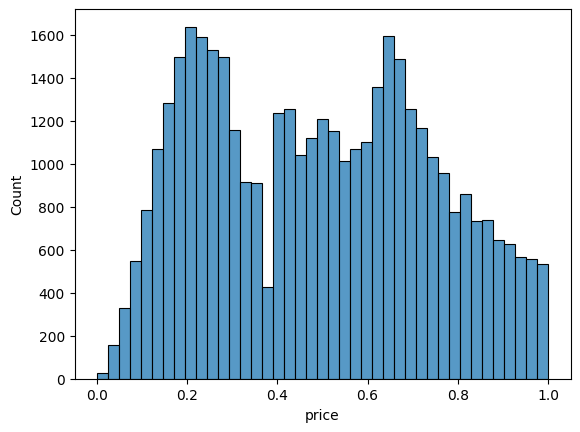

In [31]:
sns.histplot(db2['price'])

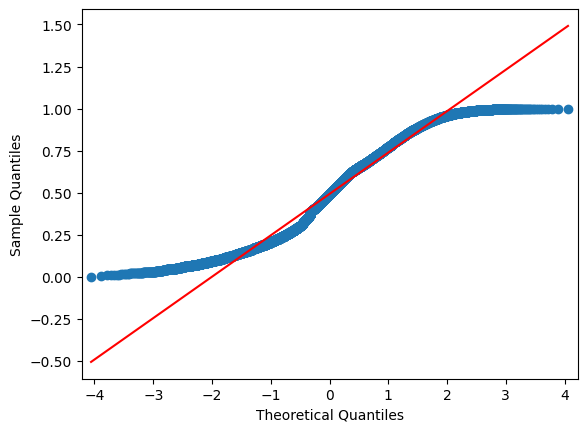

In [32]:
qqplot_price = sm.qqplot(db2["price"], line='r')

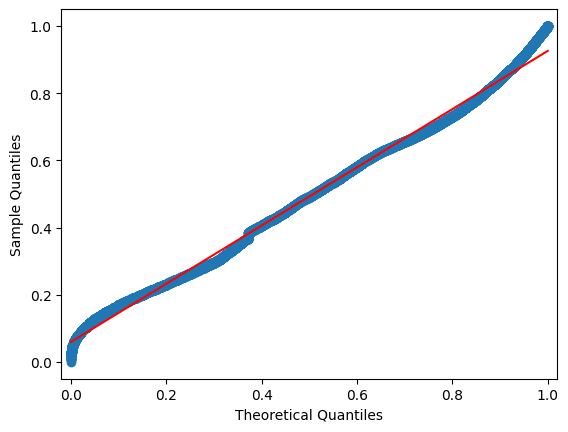

In [33]:
qqplot_price = sm.qqplot(db2['price'], dist=stats.uniform, line='r')

<AxesSubplot: xlabel='price', ylabel='Count'>

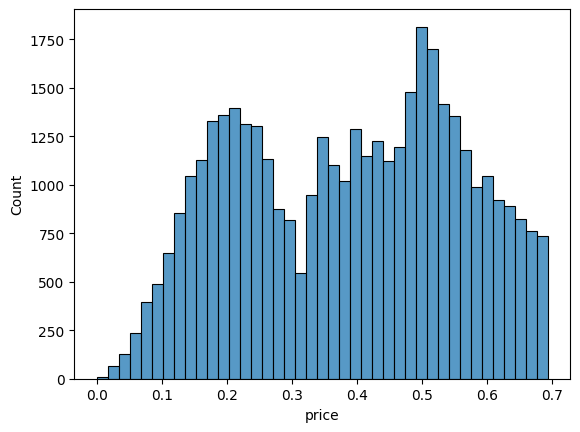

In [34]:
sns.histplot(np.log(db2['price'] + 1))

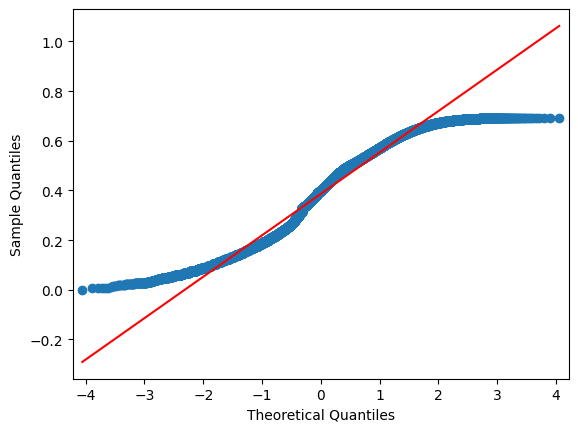

In [35]:
qqplot_price = sm.qqplot(np.log(db2['price'] + 1), line='r')

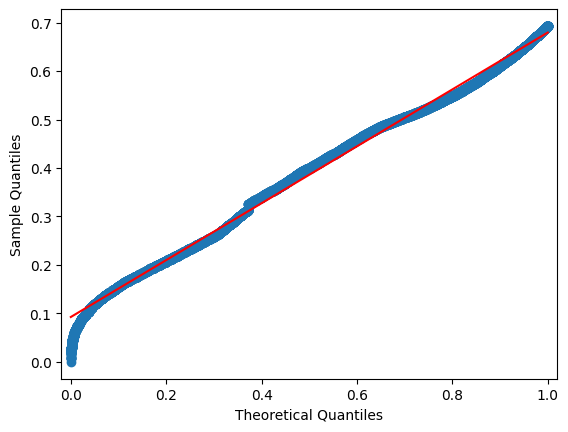

In [36]:
qqplot_price = sm.qqplot(
    np.log(db2['price'] + 1), dist=stats.uniform, line='r')

## 2.2 Removing outliers

In [27]:
db_temp = db2[["carat", "depth", "table", "price"]].values

In [28]:
column_eif = iso.iForest(
    db_temp, ntrees=500, sample_size=256, ExtensionLevel=1)

In [29]:
S1 = column_eif.compute_paths(X_in = db_temp)

In [30]:
int(len(S1) * 0.05)

2022

In [31]:
np.argsort(S1)[-int(len(S1) * 0.05):]

array([ 6673,  8642, 36112, ...,  6403,  1522, 29785])

In [32]:
mod_data = db2.loc[np.argsort(S1)[:-int(len(S1) * 0.05)]]

In [35]:
db2.std()[:4], mod_data.std()[:4]

(carat    0.098948
 depth    0.039911
 table    0.043815
 price    0.250759
 dtype: float64,
 carat    0.085549
 depth    0.035279
 table    0.040567
 price    0.240042
 dtype: float64)

In [40]:
mod_data.describe()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,...,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000,38433.000000
mean,0.114931,0.521427,0.261478,0.478661,0.086020,0.414670,0.256108,0.223766,0.185986,0.180548,...,0.150340,0.094632,0.048292,0.033669,0.242708,0.160981,0.152994,0.231910,0.071969,0.095777
std,0.085549,0.035279,0.040567,0.240042,0.280397,0.492671,0.436488,0.416772,0.389100,0.384648,...,0.357409,0.292710,0.214385,0.180378,0.428726,0.367519,0.359986,0.422057,0.258441,0.294289
min,0.000000,0.361111,0.098039,0.006658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039501,0.502778,0.235294,0.258200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.103950,0.525000,0.254902,0.480641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.170478,0.541667,0.294118,0.672750,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.411642,0.705556,0.431373,0.999753,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Загрузка данныв в бд

In [41]:
from sqlalchemy import create_engine

In [42]:
conn = create_engine("sqlite:///Diamonds")

In [43]:
mod_data.to_sql(name="Diamond_reworked", con=conn, if_exists="replace")

38433